# Simulation of the Time-Dependent Heating of the Trap in COMSOL

See the **Supplementary Note 3** for details. The exported data contains 3 cut planes *z* = 0, 0.5, 1 µm. At each grid point, there are temperature values at each simulated timestep from 0 to 10 ms with 101 values. So the time step is 0.1 ms.



Author(s): *Martin Fränzl, Prof. Dr. Frank Cichos*

## COMSOL file

`/COMSOL Files/Temperature_Trap_Time-Dependent.mph`

## Required packages

In [1]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import scipy.interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({'font.size': 14,
                     'axes.titlesize': 18,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 3,
                     'lines.markersize': 5,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',})  

## Top view

### Load COMSOL data

In [2]:
data = np.loadtxt('../Data/Temperature_Trap_Time-Dependent_Top_View_Slices.txt', skiprows=9)

In [3]:
time = 2.5 # ms
z = (data[:,2]*10).astype(int)

t_map_tstep = []
t_map_tmean = []
t_profile_tstep = []
t_profile_tmean = []

for z_slice in np.linspace(0,9,3).astype(int):
    x = data[z==z_slice, 0]
    y = data[z==z_slice, 1]
    t_tstep = data[z==z_slice, 3+int(10*time)] # single timestep 
    t_tmean = data[z==z_slice, 3:].mean(axis=1) # mean over all timesteps 

    num = 1000
    xi, yi = np.linspace(-25, 25, num), np.linspace(-25, 25, num)
    xi, yi = np.meshgrid(xi, yi)
    
    # interpolate
    t_map_tstep.append(np.nan_to_num(scipy.interpolate.griddata((x, y), t_tstep, (xi, yi), method='linear')))               
    t_map_tmean.append(np.nan_to_num(scipy.interpolate.griddata((x, y), t_tmean, (xi, yi), method='linear')))

    num = 250
    xi = np.linspace(-25, 25, num)
    t_profile_tstep.append(scipy.interpolate.griddata((x, y), t_tstep, (xi, 0), method='linear'))
    t_profile_tmean.append(scipy.interpolate.griddata((x, y), t_tmean, (xi, 0), method='linear')) 

In [4]:
ri = 5 # µm
ro = 6 # µm

### Static (single time step)

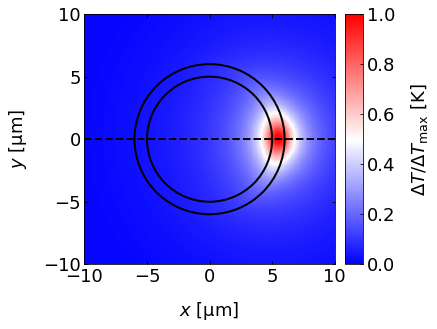

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.imshow(t_map_tstep[1]/np.max(t_map_tstep[1]), extent=[-25, 25, -25, 25], cmap='bwr', origin='lower', vmin=0) # coolwarm
ax.set_xlabel(r'$x$ [µm]')
ax.set_ylabel(r'$y$ [µm]')
ax.set_aspect('equal', 'box')
# circles
circle1 = plt.Circle((0, 0), radius=ri, color='k', lw=2, fill=False)
ax.add_patch(circle1)
circle2 = plt.Circle((0, 0), radius=ro, color='k', lw=2, fill=False)
ax.add_patch(circle2)
# lines
ax.axhline(y=0, c='k', ls='--', lw=2)
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.25, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.set_ylabel(r'$\Delta T/\Delta T_\mathrm{max}$ [K]')
ax.axis([-10, 10, -10, 10]);
#plt.savefig("Temperature_Trap_Top-View_Static.pdf", dpi=300, bbox_inches='tight',pad_inches=0.025);

### Time-averaged

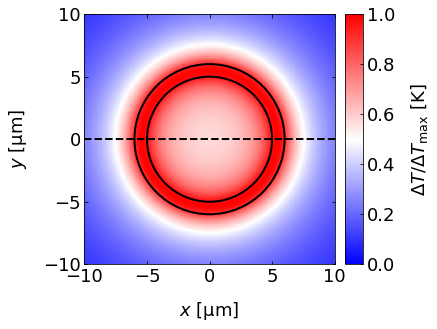

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.imshow(t_map_tmean[1]/np.max(t_map_tmean[1]), extent=[-25, 25, -25, 25], cmap='bwr', origin='lower', vmin=0) # coolwarm
ax.set_xlabel(r'$x$ [µm]')
ax.set_ylabel(r'$y$ [µm]')
ax.set_aspect('equal', 'box')
# circles
circle1 = plt.Circle((0, 0), radius=ri, color='k', lw=2, fill=False)
ax.add_patch(circle1)
circle2 = plt.Circle((0, 0), radius=ro, color='k', lw=2, fill=False)
ax.add_patch(circle2)
# lines
ax.axhline(y=0, c='k', ls='--', lw=2)
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.25, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.set_ylabel(r'$\Delta T/\Delta T_\mathrm{max}$ [K]')
ax.axis([-10, 10, -10, 10]);
#plt.savefig("Temperature_Trap_Top-View_Time-Average.pdf", dpi=300, bbox_inches='tight',pad_inches=0.025);

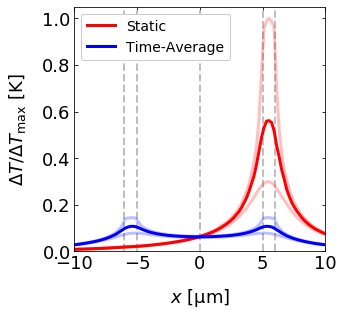

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4.5,4.5))
ax.axvline(x=0, c='0.75', ls='--', lw=2)
ax.axvline(x=-ri, c='0.75', ls='--', lw=2)
ax.axvline(x=-ro, c='0.75', ls='--', lw=2)
ax.axvline(x=ri, c='0.75', ls='--', lw=2)
ax.axvline(x=ro, c='0.75', ls='--', lw=2)
tmax = t_profile_tstep[0].max()
plt.plot(xi, t_profile_tstep[0]/tmax, 'r', alpha=0.25)
plt.plot(xi, t_profile_tstep[1]/tmax, 'r', label='Static')
plt.plot(xi, t_profile_tstep[2]/tmax, 'r', alpha=0.25)
plt.plot(xi, t_profile_tmean[0]/tmax, 'b', alpha=0.25)
plt.plot(xi, t_profile_tmean[1]/tmax, 'b', label='Time-Average')
plt.plot(xi, t_profile_tmean[2]/tmax, 'b', alpha=0.25)
ax.set_xlabel(r'$x$ [µm]')
#ax.set_ylabel(r'$\Delta T$ [K]')
ax.set_ylabel(r'$\Delta T/\Delta T_\mathrm{max}$ [K]')
ax.set_xlim(-10,10)
ax.set_ylim(ymin=0)
#ax.set_title(r'$z=0$');
ax.legend(loc='upper left', framealpha=1);
#plt.savefig('Temperature_Trap_Profiles_Static_Time-Average.pdf', bbox_inches='tight', pad_inches=0.025);

### Fit of a parabolic function to the height- and time-averaged temperature profile

In [8]:
t_map_tmean_zmean = 0
t_profile_tmean_zmean = 0

for i in range(3):
    t_map_tmean_zmean += t_map_tmean[i]
    t_profile_tmean_zmean += t_profile_tmean[i]

t_map_tmean_zmean /= 3
t_profile_tmean_zmean /= 3

In [9]:
from scipy.optimize import curve_fit

def tr_profile(x, alpha, tcenter):
    return alpha*x**2/2 + tcenter

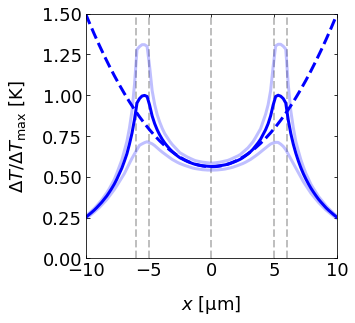

In [10]:
tmax = t_profile_tmean_zmean.max()

idx = np.where((xi > -3.5) & (xi < 3.5))
(alpha_rel, t_center), _ = curve_fit(tr_profile, xi[idx], t_profile_tmean_zmean[idx]/tmax) #, p0=[800,0,1]
fit_tr = tr_profile(xi, alpha_rel, t_center)

fig, ax = plt.subplots(1, 1, figsize=(4.5,4.5))
ax.axvline(x=0, c='0.75', ls='--', lw=2)
ax.axvline(x=-ri, c='0.75', ls='--', lw=2)
ax.axvline(x=-ro, c='0.75', ls='--', lw=2)
ax.axvline(x=ri, c='0.75', ls='--', lw=2)
ax.axvline(x=ro, c='0.75', ls='--', lw=2)
plt.plot(xi, t_profile_tmean[0]/tmax, 'b', alpha=0.25)
plt.plot(xi, t_profile_tmean_zmean/tmax, 'b', label='Time-Averaged')
plt.plot(xi, t_profile_tmean[2]/tmax, 'b', alpha=0.25)
ax.plot(xi, fit_tr, c='b', ls='--')
ax.set_xlabel(r'$x$ [µm]')
ax.set_ylabel(r'$\Delta T/\Delta T_\mathrm{max}$ [K]')
ax.set_xlim(-10,10)
ax.set_ylim(0, 1.5);
#plt.savefig(Temperature_Trap_Profile_Height-Time-Average_Fit.pdf', bbox_inches='tight', pad_inches=0.025);
np.savetxt('../Data/Temperature_Trap_Height-Time-Average_Profile.txt',  np.transpose([xi, t_profile_tmean_zmean/tmax]), fmt='%.5f')

In [11]:
print('t_center = %1.2f' % (t_center))

t_center = 0.56


In [12]:
print('alpha_rel = %1.3f' % (alpha_rel))

alpha_rel = 0.019


## Cross-section

### Load the COMSOL data

In [13]:
data = np.loadtxt('../Data/Temperature_Trap_Time-Dependent_Cross-Section.txt', skiprows=9)

In [14]:
x = data[:,0]
#y = data[:,1]
z = data[:,2]
time = 2.5 # ms
t_timestep = data[:,3+int(10*time)] # single timestep 
t_mean = data[:,3:].mean(axis=1) # mean over all timesteps 

# set up a regular grid of interpolation points
num = 1000
xi, zi = np.linspace(-25, 25, num), np.linspace(-25, 25, num)
xi, zi = np.meshgrid(xi, zi)
# interpolate
t_map_timestep = np.nan_to_num(scipy.interpolate.griddata((x, z), t_timestep, (xi, zi), method='linear')) 
t_map_mean = np.nan_to_num(scipy.interpolate.griddata((x, z), t_mean, (xi, zi), method='linear')) 

### Static (single time step)

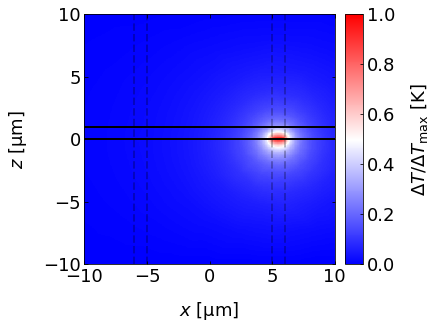

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.imshow(t_map_timestep/np.max(t_map_timestep), extent=[-25, 25, -25, 25], cmap='bwr', origin='lower', vmin=0) # coolwarm
ax.set_xlabel(r'$x$ [µm]')
ax.set_ylabel(r'$z$ [µm]')
ax.set_aspect('equal', 'box')
# lines
ax.axhline(y=1, c='k', ls='-', lw=2)
ax.axhline(y=0, c='k', ls='-', lw=2)

ax.axvline(x=ri, c='k', alpha=0.25, ls='--', lw=2)
ax.axvline(x=ro, c='k', alpha=0.25, ls='--', lw=2)
ax.axvline(x=-ri, c='k', alpha=0.25, ls='--', lw=2)
ax.axvline(x=-ro, c='k', alpha=0.25, ls='--', lw=2)
#ax.axvline(y=0, c='k', ls='--', lw=2)
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.25, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.set_ylabel(r'$\Delta T/\Delta T_\mathrm{max}$ [K]')
ax.axis([-10, 10, -10, 10]);
#plt.savefig("Temperature_Trap_Cross-Section_Static.pdf", dpi=300, bbox_inches='tight',pad_inches=0.025);

### Time-average

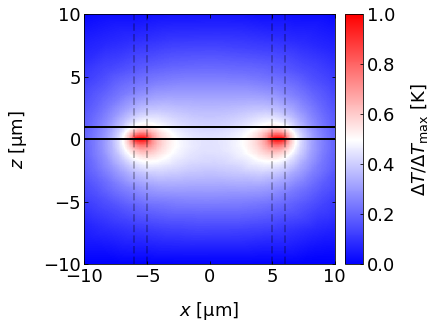

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
im = ax.imshow(t_map_mean/np.max(t_map_mean), extent=[-25, 25, -25, 25], cmap='bwr', origin='lower', vmin=0) # coolwarm
ax.set_xlabel(r'$x$ [µm]')
ax.set_ylabel(r'$z$ [µm]')
ax.set_aspect('equal', 'box')
# lines
ax.axhline(y=1, c='k', ls='-', lw=2)
ax.axhline(y=0, c='k', ls='-', lw=2)

ax.axvline(x=ri, c='k', alpha=0.25, ls='--', lw=2)
ax.axvline(x=ro, c='k', alpha=0.25, ls='--', lw=2)
ax.axvline(x=-ri, c='k', alpha=0.25, ls='--', lw=2)
ax.axvline(x=-ro, c='k', alpha=0.25, ls='--', lw=2)
#ax.axvline(y=0, c='k', ls='--', lw=2)
# colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.25, pad=0.15)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.set_ylabel(r'$\Delta T/\Delta T_\mathrm{max}$ [K]')
ax.axis([-10, 10, -10, 10]);
#plt.savefig("Temperature_Trap_Cross-Section_Time-Average.pdf", dpi=300, bbox_inches='tight',pad_inches=0.025);